# Testing out just rollouts of large numbers of trajectories!

In [1]:

from utilities import rollout
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

In [14]:


# Must use the same configuration as the one you trained the model in to evalaute it
config = {
    "observation": {
        "type": "Kinematics",  # Ensures observation matches training
        "features": ["x", "y", "vx", "vy"],  # Feature set used in training
    },
    "action": {
        "type": "DiscreteMetaAction",
    },
    "lanes_count": 5,  # Number of lanes in the roundabout
    "vehicles_count": 1,  # Total number of vehicles
    "duration": 100,  # Simulation steps
    "collision_reward": -1.0,  # Penalty for collision
    "reward_speed_range": [20, 30],  # Preferred speed range
}



scenario = "roundabout-v0" 
render_mode = "rgb_array"

# Setting up the environment
env = gym.make(scenario, render_mode=render_mode, config = config)
env.unwrapped.configure(config)
# env.config['lanes_count'] = 1
env.reset()
# Load the trained model
model = DQN.load("dqn_highway_roundabout")

trajectories = []

for i in range(3):
    trajectories.append(rollout(model,env,plot = False))


/Users/gracekim/Documents/School_Everything_and_LEARNING/Stanford/Githubs/Agentic-Safety-Validation/.venv/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/Users/gracekim/Documents/School_Everything_and_LEARNING/Stanford/Githubs/Agentic-Safety-Validation/.venv/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(


[ 0.01861403  1.          0.05092392 -0.21851133]
[ 0.08287161  1.          0.18060087 -0.16647014]
[ 0.12044391  0.02282146  0.01918352 -0.24851212]
[ 0.08162965 -1.         -0.17020205 -0.18294075]
[ 0.01971666 -1.         -0.09477066 -0.21319535]
[-0.00374267 -1.         -0.03366864 -0.07574071]
[-0.01242562 -1.         -0.01196127 -0.02690797]
[-0.01551036 -1.         -0.00424941 -0.00955945]
[-0.01660626 -1.         -0.00150966 -0.00339613]
[-1.6995590e-02 -1.0000000e+00 -5.3633004e-04 -1.2065240e-03]
[-1.7133908e-02 -1.0000000e+00 -1.9053895e-04 -4.2863499e-04]
[-1.7183047e-02 -1.0000000e+00 -6.7691704e-05 -1.5227874e-04]
[-1.7200503e-02 -1.0000000e+00 -2.4048450e-05 -5.4099208e-05]
[-1.7206706e-02 -1.0000000e+00 -8.5435568e-06 -1.9219522e-05]
[-1.7208910e-02 -1.0000000e+00 -3.0352214e-06 -6.8280110e-06]
[-1.7209692e-02 -1.0000000e+00 -1.0783060e-06 -2.4257490e-06]
[-1.7209969e-02 -1.0000000e+00 -3.8308372e-07 -8.6178221e-07]
[-1.7210068e-02 -1.0000000e+00 -1.3609599e-07 -3.06160

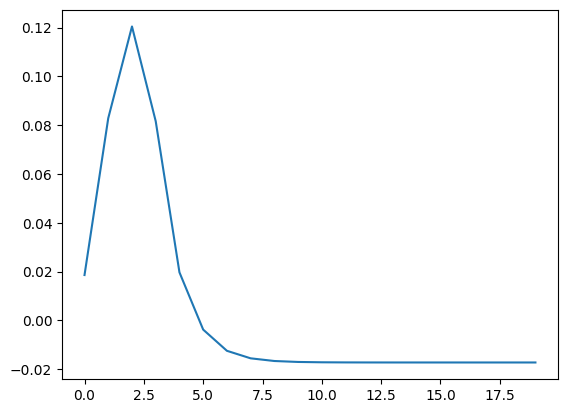

: 

In [ ]:
# for i in trajectories[0]:
    # print("observation ",i[0][0])
    # print("action ",i[1])
    # print("reward ",i[2])

import matplotlib.pyplot as plt
# [[ 0.01861403  1.          0.05092392 -0.21851133]
# [[ 0.01861403  1.          0.05092392 -0.21851133]
x = 0

for i in range(1):
    car_1_x = []
    car_1_y = []
    car_1_x_vel = []
    car_1_y_vel  = []
    for trajectory in trajectories[i]:
        for observation in trajectory[0:1]:
            for car in observation[0:1]:
                print(car)
                car_1_x.append(car[0])
                car_1_y.append(car[1])
                car_1_x_vel.append(car[2])
                car_1_y_vel.append(car[3])

    # plt.plot(car_1_x,car_1_y, label = "trial"+str(i))
    t = []
    for j in range(len(car_1_x)):
        t.append(j)

    plt.plot(t,car_1_x, label = "trial"+str(i))
    # plt.gca().set_aspect(1)


# plt.legend()



## GOALS:

Going into the weekend
- proposal trajectory distribution / nominal trajectory (how do we build this out? for something like this?)
    - how do you do this for a 2d problem
    - how to tell from this probability distribution how it would be sampled from that trajectory
- how do we make it more granular for info?


### 2/19/2025 - Allie / Grace

- plotting the car with x,y
- plotting initial state distributions? (positions and velocities?)
- config >> only lets us do 5 cars for now **note for the future / testing other envs**
    - can add car after we build environment?



In [2]:
# from rl import rollout
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

In [3]:

# Load the environment
env = gym.make("roundabout-v0", render_mode="rgb_array")

# create configuration
config = {
    "observation": {
        "type": "Kinematics",  
        "features": ["x", "y", "vx", "vy"],  
    },
    "action": {
        # if want more control over action space, switch to "ContinuousAction"
        "type": "DiscreteMetaAction",
    },
    "lanes_count": 2,  # Number of lanes in the roundabout - fixed
    "vehicles_count": 5,  # fixed
    "duration": 100,  
    "collision_reward": -1.0,  
    "reward_speed_range": [20, 30],  
    # policy_frequency = agent makes decisions 5 times per second
    "policy_frequency": 15,   # increase to make the agent act more frequently
    # environment updates 30 times per second
    "simulation_frequency": 30,  # Increase to make environment update more frequently
    # agent makes a decision every simulation_frequency / policy_frequency steps.
}

env.unwrapped.configure(config) 

In [4]:
import numpy as np
def genInitialDist(numSims,env):
    numCars = 4 # TODO: need to automate later len(obs[1:])
    params = ['x','y','vx','vy'] # TODO: need to automate later len(obs[1:])
    initialStates = {}
    for param in params:
         for i in range(numCars):
            initialStates[f'car{i+1}{param}'] = np.zeros(numSims)
    for sim in range(numSims):
        obs, _ = env.reset()
        for car in range(numCars):
            # for car in initialState:
            # print(initialStates.keys())
            for ob in range(len(obs[car+1])):
                initialStates["car"+str(car+1)+params[ob]][sim] = obs[car+1][ob]
    return initialStates

In [5]:
# from utilities import genInitialDist

model = DQN.load("dqn_highway_roundabout")
numT = 1000
numSteps = 100

initialStates = genInitialDist(numT,env)

# initStates = []
# for i in range(numT):
#     obs, _ = env.reset()
#     print(obs)
#     initialState = obs[-4:]
#     # for car in initialState:
#     initStates.append(initialState[2])

# print(initStates)

# run 5 trajectories, each for 10 timesteps
# rewards, initStates, positions = episode(env, model, numSteps, numT)

# show each trajectory info 
# showTrajectoryInfo(numT, rewards, initStates, positions)

/Users/gracekim/Documents/School_Everything_and_LEARNING/Stanford/Githubs/Agentic-Safety-Validation/.venv/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/Users/gracekim/Documents/School_Everything_and_LEARNING/Stanford/Githubs/Agentic-Safety-Validation/.venv/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
initialStates['car1x']

array([-1.75103527e-02, -6.88182050e-03, -2.72577405e-02, -2.14410890e-02,
       -1.70322843e-02, -3.18158418e-02, -2.95328815e-02, -3.71109731e-02,
       -9.53926519e-03, -3.01803425e-02, -2.14705281e-02, -3.32524553e-02,
       -3.87133583e-02, -2.15241350e-02, -2.43103039e-02, -2.42784303e-02,
       -9.35849547e-03, -2.34185178e-02, -1.09630385e-02, -3.63085978e-02,
       -2.92981360e-02, -1.72045454e-02, -3.50667201e-02, -3.48711461e-02,
       -4.47634906e-02, -2.72558481e-02, -2.59090904e-02, -2.50898097e-02,
       -2.32636593e-02, -1.41478116e-02, -9.63603705e-03, -2.04612445e-02,
       -2.77752466e-02, -2.25714836e-02, -4.41439003e-02, -2.12849174e-02,
       -1.77268719e-03, -1.81188881e-02, -2.28040405e-02, -3.37711982e-02,
       -2.73417309e-02, -3.60334665e-02, -2.67552901e-02, -1.20011372e-02,
       -3.38433385e-02, -2.76225954e-02, -2.23364998e-02, -1.94213409e-02,
       -4.34222110e-02, -1.33289173e-02, -2.45267004e-02, -2.21000500e-02,
       -1.72570515e-02, -

In [37]:
initialStates.keys()

dict_keys(['car1x', 'car2x', 'car3x', 'car4x', 'car1y', 'car2y', 'car3y', 'car4y', 'car1vx', 'car2vx', 'car3vx', 'car4vx', 'car1vy', 'car2vy', 'car3vy', 'car4vy'])

In [57]:
initStates[:]
x = np.array(initStates)
np.save('car3.npy', x)

x_col = x[:, 0]

(array([ 4.,  2.,  3.,  6.,  8.,  3., 14., 20., 12., 22., 26., 40., 31.,
        47., 41., 30., 47., 52., 45., 39., 36., 42., 43., 30., 51., 22.,
        38., 23., 37., 26., 27., 22., 10., 23.,  8., 20., 10.,  7.,  5.,
         3.,  4.,  3.,  4.,  2.,  2.,  2.,  3.,  2.,  0.,  3.]),
 array([-0.12043083, -0.11978527, -0.11913972, -0.11849416, -0.1178486 ,
        -0.11720305, -0.11655749, -0.11591194, -0.11526638, -0.11462083,
        -0.11397527, -0.11332971, -0.11268416, -0.1120386 , -0.11139305,
        -0.11074749, -0.11010194, -0.10945638, -0.10881082, -0.10816527,
        -0.10751971, -0.10687416, -0.1062286 , -0.10558305, -0.10493749,
        -0.10429193, -0.10364638, -0.10300082, -0.10235527, -0.10170971,
        -0.10106416, -0.1004186 , -0.09977304, -0.09912749, -0.09848193,
        -0.09783638, -0.09719082, -0.09654527, -0.09589971, -0.09525415,
        -0.0946086 , -0.09396304, -0.09331749, -0.09267193, -0.09202638,
        -0.09138082, -0.09073526, -0.09008971, -0.08944415,

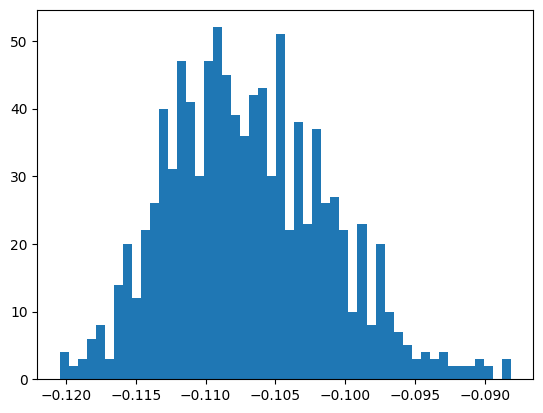

In [8]:
plt.hist(initialStates['car2x'],bins = 50)

In [41]:
print("Full Config:", env.unwrapped.config)

Full Config: {'observation': {'type': 'Kinematics', 'features': ['x', 'y', 'vx', 'vy']}, 'action': {'type': 'DiscreteMetaAction'}, 'simulation_frequency': 30, 'policy_frequency': 15, 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle', 'screen_width': 600, 'screen_height': 600, 'centering_position': [0.5, 0.6], 'scaling': 5.5, 'show_trajectories': False, 'render_agent': True, 'offscreen_rendering': False, 'manual_control': False, 'real_time_rendering': False, 'incoming_vehicle_destination': None, 'collision_reward': -1.0, 'high_speed_reward': 0.2, 'right_lane_reward': 0, 'lane_change_reward': -0.05, 'duration': 100, 'normalize_reward': True, 'lanes_count': 2, 'vehicles_count': 5, 'reward_speed_range': [20, 30]}


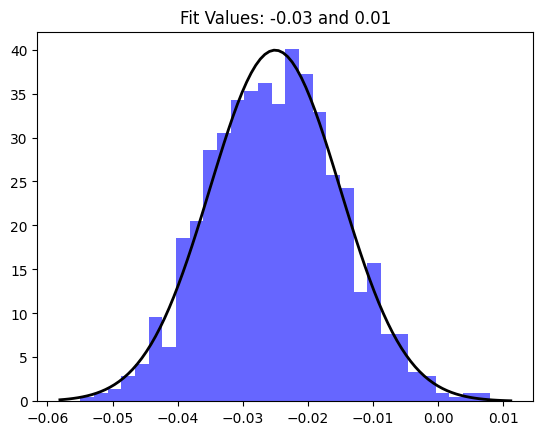

In [13]:

from scipy.stats import norm

# Generate some data for this 
# demonstration.
# data = np.random.normal(170, 10, 250)

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(initialStates['car1x'] ) 

# Plot the histogram.
plt.hist(initialStates['car1x'] , bins=30, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()